In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Top Indian Places to Visit.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# ✅ Rename columns
df.rename(columns={
    'Geographic_Location': 'Zone',
    'Google_Review': 'Google_review_rating'
}, inplace=True)

df.head()

Saving Top Indian Places to Visit.csv to Top Indian Places to Visit (1).csv


,Unnamed:_0,Zone,State,City,Name,Type,Establishment_Year,time_needed_to_visit_in_hrs,Google_review_rating,Entrance_Fee_in_INR,Airport_with_50km_Radius,Weekly_Off,Significance,DSLR_Allowed,Number_of_google_review_in_lakhs,Best_Time_to_visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [ ]:
# View data structure
df.dropna(subset=['Zone', 'Google_review_rating', 'Significance'], inplace=True)

# Label encode categorical columns
le = LabelEncoder()
for col in ['Zone', 'Significance']:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

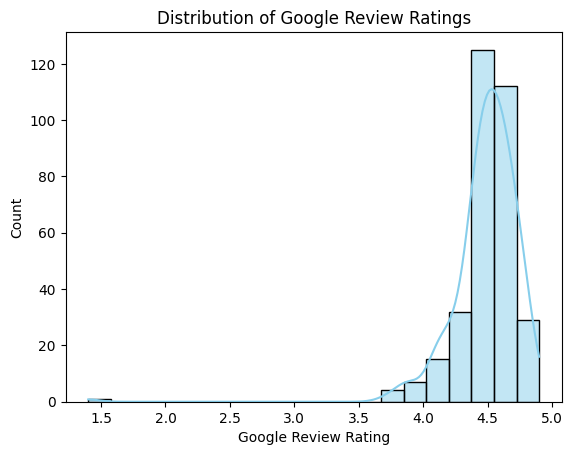

<ipython-input-12-16b8d313c4d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Zone', data=df, palette='mako')


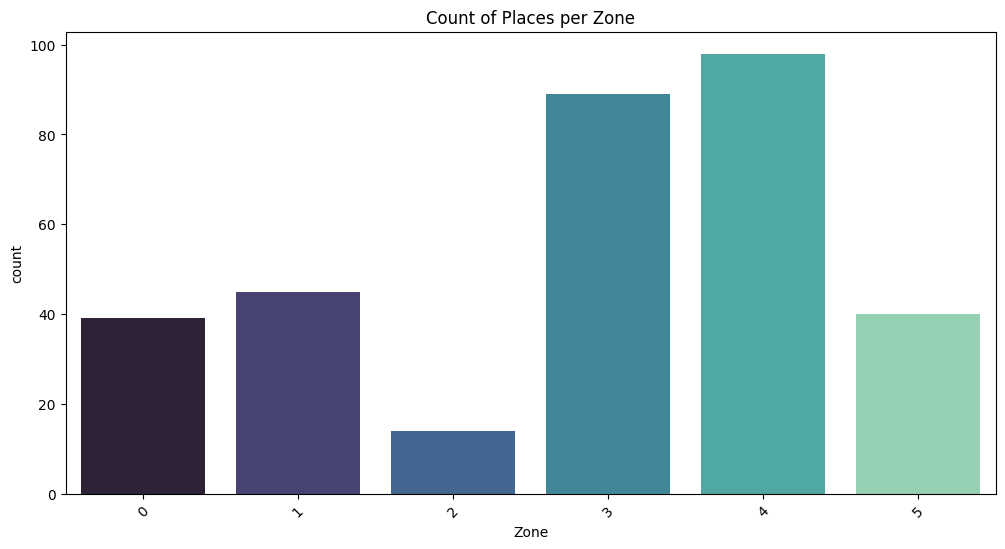

<ipython-input-12-16b8d313c4d5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Significance', y='Google_review_rating', data=df, palette='viridis')


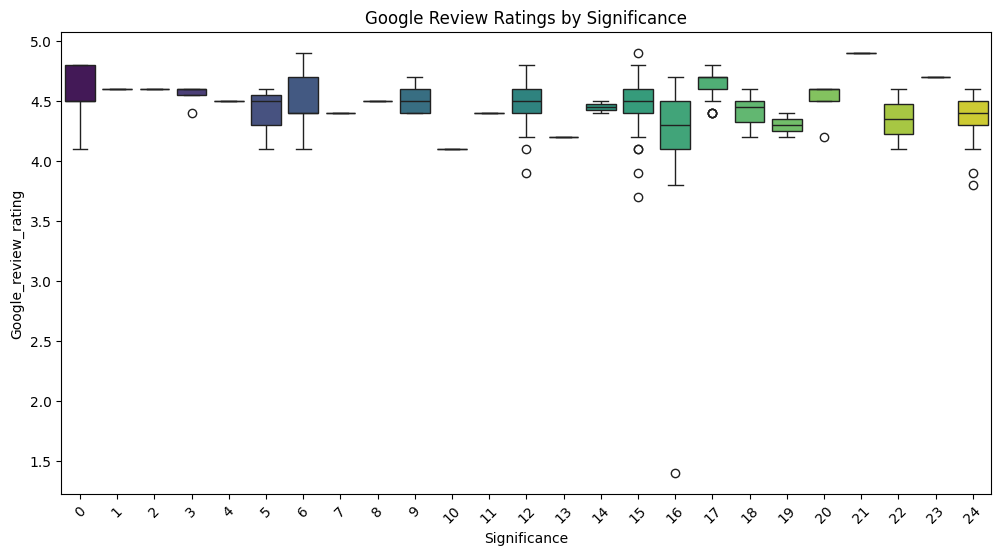

In [ ]:
sns.histplot(df['Google_review_rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Google Review Ratings")
plt.xlabel("Google Review Rating")
plt.ylabel("Count")
plt.show()

# Count by Zone
plt.figure(figsize=(12, 6))
sns.countplot(x='Zone', data=df, palette='mako')
plt.title("Count of Places per Zone")
plt.xticks(rotation=45)
plt.show()

# Significance vs Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Significance', y='Google_review_rating', data=df, palette='viridis')
plt.title("Google Review Ratings by Significance")
plt.xticks(rotation=45)
plt.show()

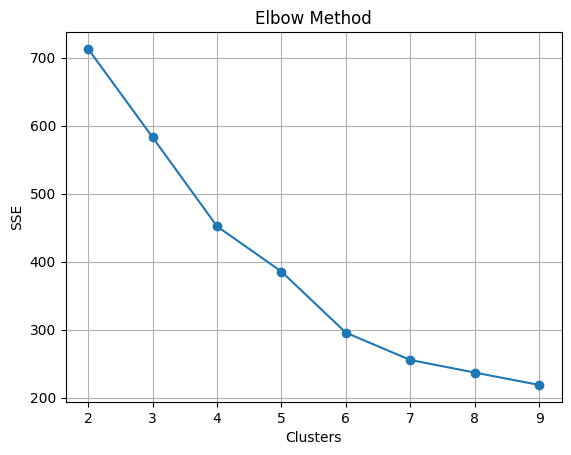

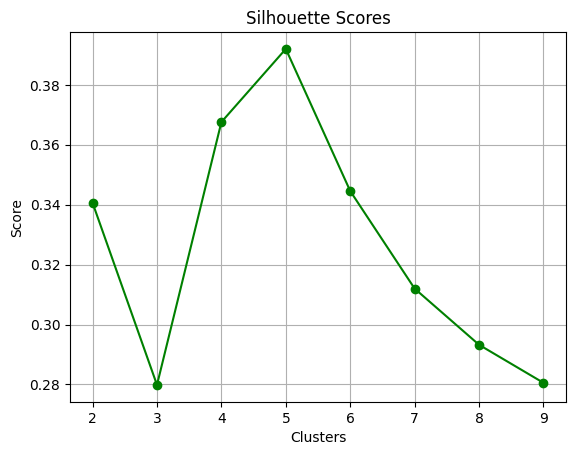

In [ ]:
# Select Features
features = ['Zone', 'Google_review_rating', 'Significance']
X = df[features]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow + Silhouette
sse, sil = [], []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, km.labels_))

# Plot Elbow
plt.plot(range(2, 10), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

# Plot Silhouette
plt.plot(range(2, 10), sil, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# Fit final model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

             Zone       Google_review_rating       Significance      
             mean count                 mean count         mean count
Segment                                                              
0        3.766917   133             4.547368   133    17.563910   133
1        0.616279    86             4.525581    86    15.639535    86
2        3.566038   106             4.377358   106    10.490566   106


<ipython-input-14-c28b9026c797>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=df, palette='Set2')


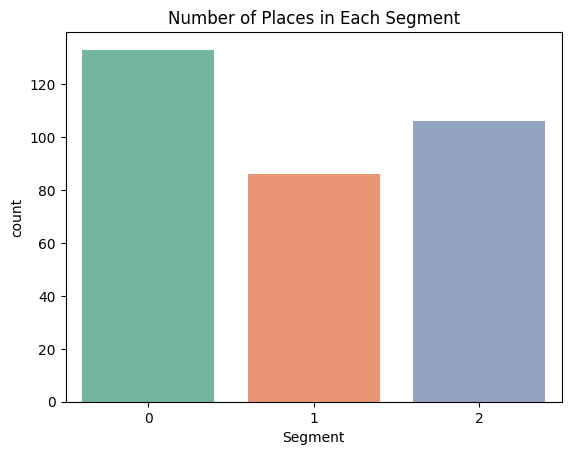

In [ ]:
print(df.groupby('Segment')[features].agg(['mean', 'count']))

# Countplot
sns.countplot(x='Segment', data=df, palette='Set2')
plt.title("Number of Places in Each Segment")
plt.show()

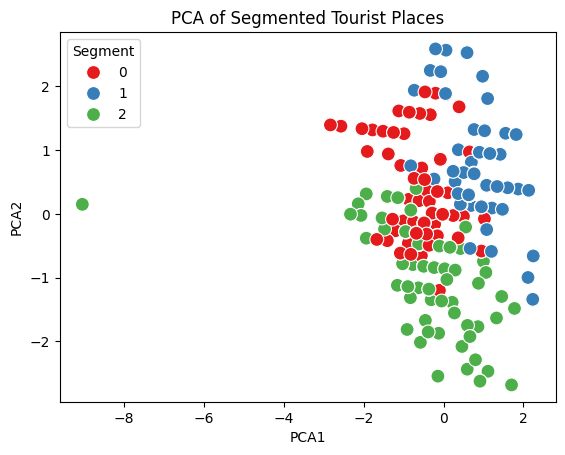

In [ ]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_res[:, 0], pca_res[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=df, palette='Set1', s=100)
plt.title("PCA of Segmented Tourist Places")
plt.show()


In [ ]:
df.to_csv("Segmented_Tourist_Places_Updated.csv", index=False)
files.download("Segmented_Tourist_Places_Updated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>